### Step 1:

In [1]:
#pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [2]:
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

seed = 1

In [3]:
# Load pre-trained AlexNet model
model = models.alexnet(pretrained=True)
model.eval()

# Define the layers from which activations need to be extracted
layers_of_interest = {
    'Conv1': model.features[0],
    'Conv2': model.features[3],
    'Conv3': model.features[6],
    'Conv4': model.features[8],
    'Conv5': model.features[10],
    'fc6': model.classifier[1],
    'fc7': model.classifier[4],
}

# Store activations for each layer for each image
activations_per_layer_per_image = {layer_name: [] for layer_name in layers_of_interest}

# Hook function to store activations
def hook_fn(module, input, output, layer_name):
    activations_per_layer_per_image[layer_name].append(output.detach().numpy())

# Register hooks on layers of interest
hooks = []
for layer_name, layer_module in layers_of_interest.items():
    hook = layer_module.register_forward_hook(lambda _, inp, out, name=layer_name: hook_fn(_, inp, out, name))
    hooks.append(hook)

# Load and preprocess the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

image_folder = "C:/Users/parik/Desktop/MDA/AI2/Assignment 4/Image Set"

# Generate image paths
image_paths = [os.path.join(image_folder, f"{i:03d}.jpg") for i in range(1, 157)]

# Process each image and extract activations
for img_path in image_paths:
    img = Image.open(img_path)
    img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

    # Forward pass through the model
    _ = model(img_tensor)

# Remove hooks
for hook in hooks:
    hook.remove()

# Convert activations lists to numpy arrays and flatten the feature maps
for layer_name in activations_per_layer_per_image:
    activations = activations_per_layer_per_image[layer_name]
    activations_per_layer_per_image[layer_name] = np.array(activations).reshape(len(image_paths), 1, -1)

# Print the shape of the extracted activations for each layer per image
for layer_name, activations_array in activations_per_layer_per_image.items():
    print(f"{layer_name}: {activations_array.shape}")


C:\Users\parik\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\parik\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Conv1: (156, 1, 193600)
Conv2: (156, 1, 139968)
Conv3: (156, 1, 64896)
Conv4: (156, 1, 43264)
Conv5: (156, 1, 43264)
fc6: (156, 1, 4096)
fc7: (156, 1, 4096)


### Step 2:

In [4]:
from scipy.spatial.distance import euclidean

# Calculate pairwise Euclidean distances between activation vectors
rdm_matrix = np.zeros((len(image_paths), len(image_paths)))

for i in range(len(image_paths)):
    for j in range(len(image_paths)):
        dist = 0
        for layer_name in activations_per_layer_per_image:
            # Compute Euclidean distance between activation vectors of images i and j for each layer
            dist += euclidean(activations_per_layer_per_image[layer_name][i].flatten(),
                              activations_per_layer_per_image[layer_name][j].flatten()) ** 2

        rdm_matrix[i, j] = np.sqrt(dist)  # Store the square root of the sum of squared distances

# Print or use the RDM matrix as needed
print("Representational Dissimilarity Matrix (RDM):")
print(rdm_matrix)

Representational Dissimilarity Matrix (RDM):
[[   0.         1381.53002488 1257.87082555 ... 1333.51835264
  1383.02806656 1316.17098621]
 [1381.53002488    0.         1199.88463362 ... 1315.48446647
  1330.07686742 1263.92415697]
 [1257.87082555 1199.88463362    0.         ... 1178.95912002
  1229.07870934 1143.37255175]
 ...
 [1333.51835264 1315.48446647 1178.95912002 ...    0.
  1156.46990646 1105.8477494 ]
 [1383.02806656 1330.07686742 1229.07870934 ... 1156.46990646
     0.         1009.96332385]
 [1316.17098621 1263.92415697 1143.37255175 ... 1105.8477494
  1009.96332385    0.        ]]


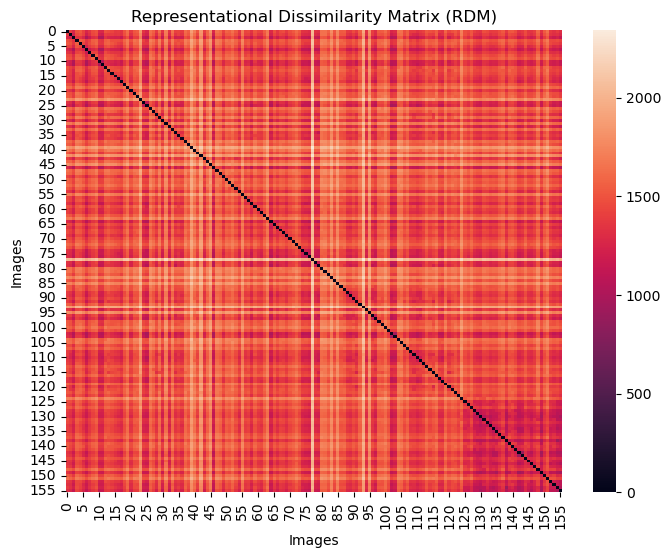

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(rdm_matrix)
plt.title('Representational Dissimilarity Matrix (RDM)')
plt.xlabel('Images')
plt.ylabel('Images')
plt.show()

### Step 3:

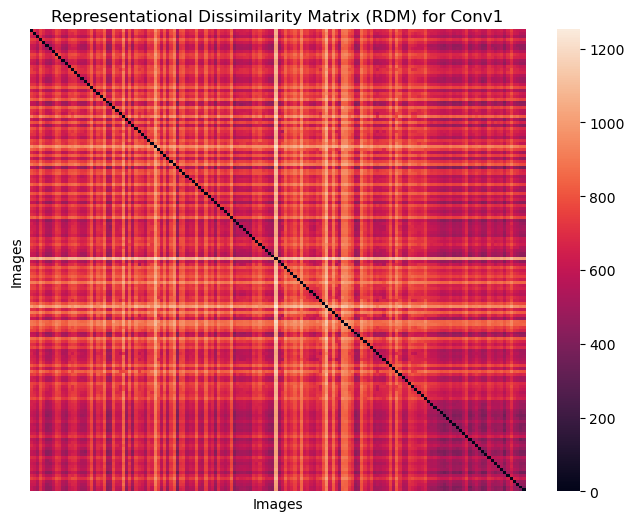

C:\Users\parik\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


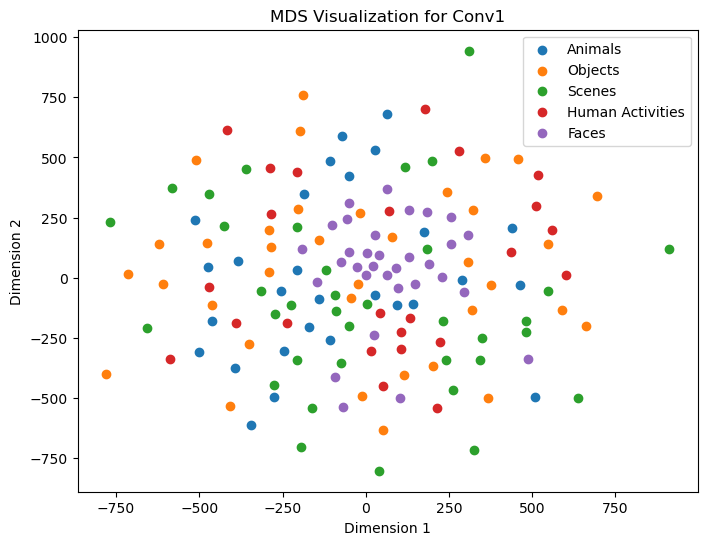

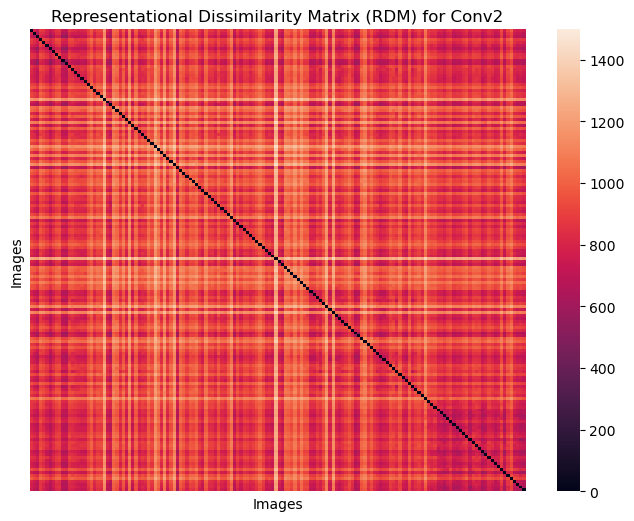

C:\Users\parik\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


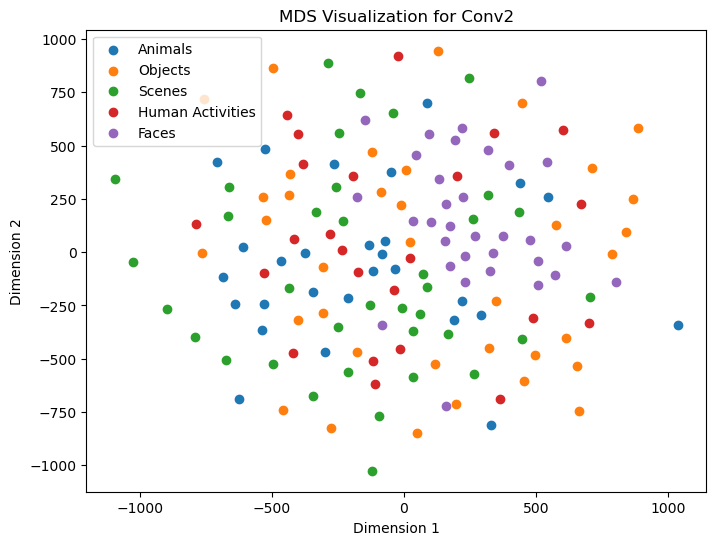

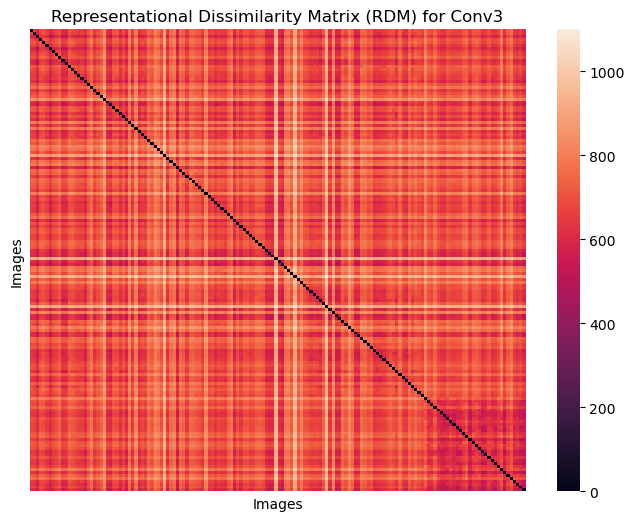

C:\Users\parik\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


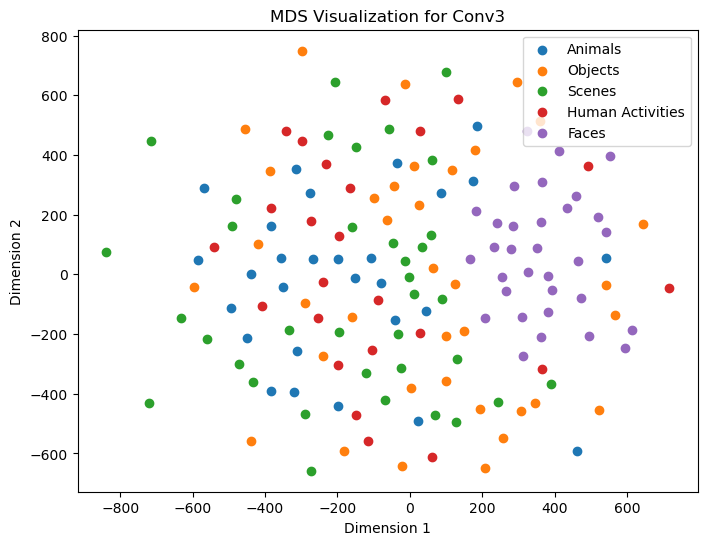

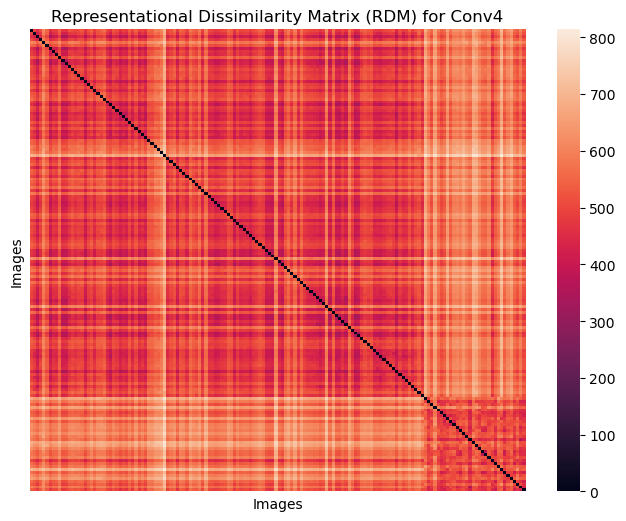

C:\Users\parik\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


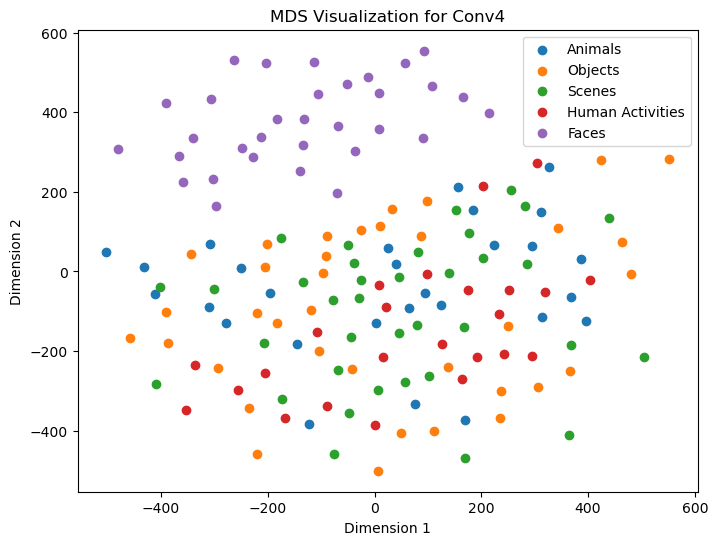

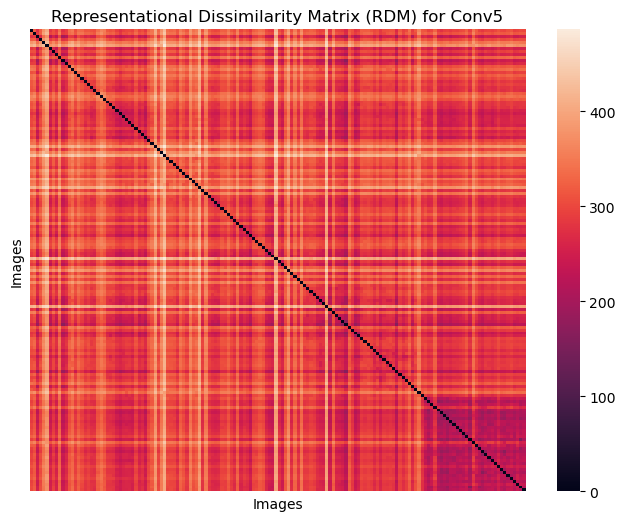

C:\Users\parik\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


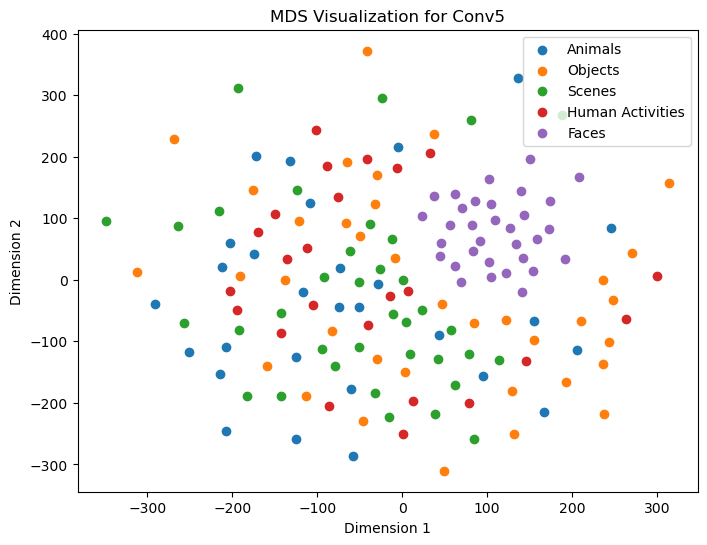

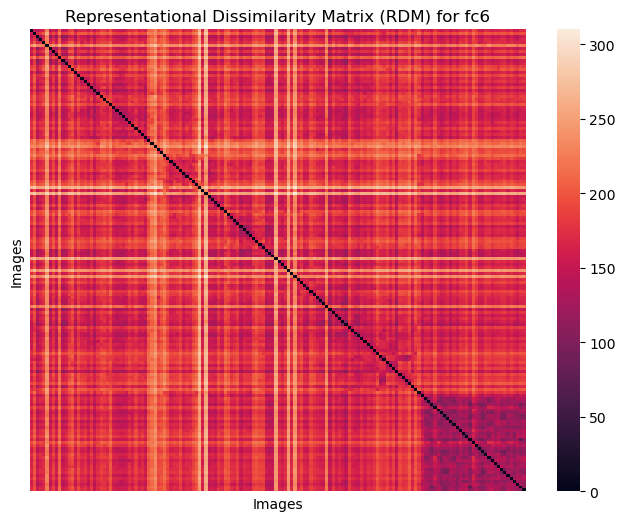

C:\Users\parik\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


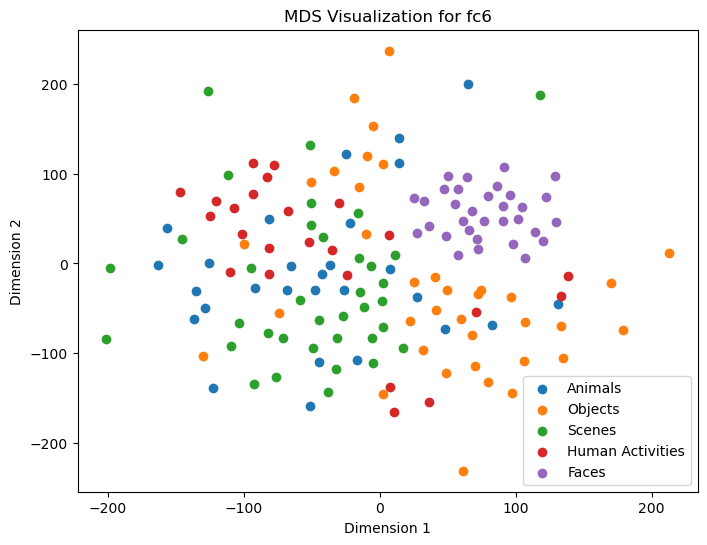

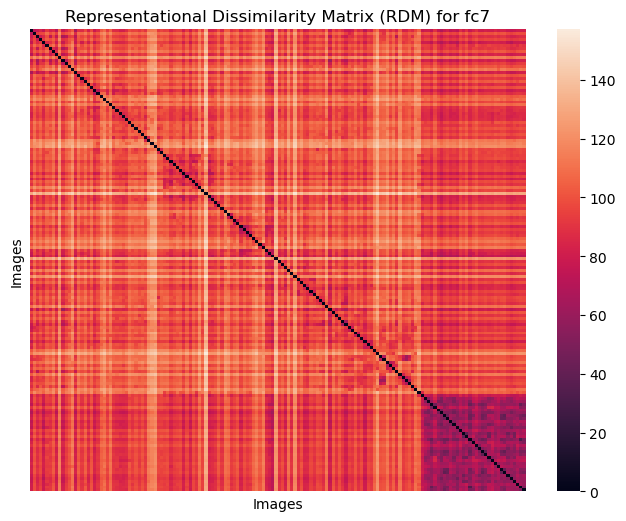

C:\Users\parik\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


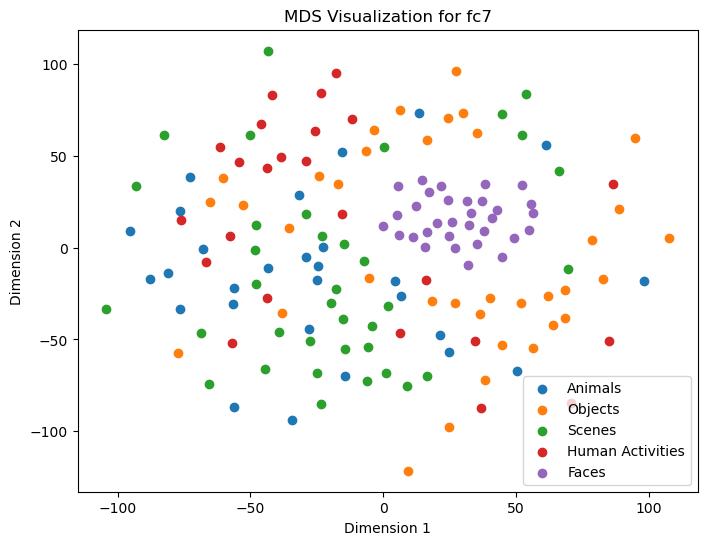

In [6]:
from sklearn.manifold import MDS

# Retrieve available layer names from activations_per_layer_per_image
available_layers = list(activations_per_layer_per_image.keys())

# Define the class labels
class_labels = {
    'Animals': list(range(0, 28)),  # Adjusted index range to start from 0
    'Objects': list(range(28, 64)),  # Adjusted index range
    'Scenes': list(range(64, 100)),  # Adjusted index range
    'Human Activities': list(range(100, 124)),  # Adjusted index range
    'Faces': list(range(124, 156))  # Adjusted index range
}

for layer_name in available_layers:
    # Calculate pairwise Euclidean distances between activation vectors for the current layer
    rdm_matrix = np.zeros((len(image_paths), len(image_paths)))
    
    for i in range(len(image_paths)):
        for j in range(len(image_paths)):
            dist = euclidean(activations_per_layer_per_image[layer_name][i].flatten(),
                             activations_per_layer_per_image[layer_name][j].flatten())
            rdm_matrix[i, j] = dist
    
    # Plot heatmap of the RDM matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(rdm_matrix, xticklabels=False, yticklabels=False)
    plt.title(f'Representational Dissimilarity Matrix (RDM) for {layer_name}')
    plt.xlabel('Images')
    plt.ylabel('Images')
    plt.show()
    
    # Perform MDS to visualize in 2 dimensions
    embedding = MDS(n_components=2, dissimilarity='precomputed',random_state=seed)
    coords = embedding.fit_transform(rdm_matrix)
    
    # Plot MDS visualization
    plt.figure(figsize=(8, 6))
    for label, indices in class_labels.items():
        x = coords[indices, 0]
        y = coords[indices, 1]
        plt.scatter(x, y, label=label)

    plt.title(f'MDS Visualization for {layer_name}')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

### Report:

The results from the MDS plots show that the points for the Faces category are more close and clustered than the other categories. This could be due to the diversity within each of the categories. Meaning, some categories like Animals, Objects, Scenes, and Human Activities can be more diverse and contain subcategories with different visual characteristics. For example, within the "Animals" category, there might be various types of animals with significantly different appearances such as hosrses and dogs, whereas the "Faces" category might have more consistent visual features.
In general, the observed convergence or closeness of class clusters in MDS plots across layers reflects the network's ability to learn hierarchical, abstract, and discriminative features, which aids in better class separation as it progresses through the network layers.